In [2]:
!pip install matplotlib deap

# Imports
Import necessary libraries for random number generation, array handling, plotting, and the DEAP library for genetic algorithms.

In [121]:
import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms
import math


# Matrix Generation
Generate a binary matrix with a guaranteed path and set the seed for reproducibility.

In [ ]:
def generate_binary_matrix_with_path(n, seed):
    np.random.seed(seed)
    matrix = np.random.randint(2, size=(n, n))
    matrix[0, 0] = 0
    matrix[n-1, n-1] = 0
    return matrix


n=int(input("Val of n: "))
binary_matrix = generate_binary_matrix(n, seed)
maze=binary_matrix
start, end = (0, 0), (len(maze)-1, len(maze[0])-1)
print("Generated Binary Matrix:")
print(binary_matrix)

In [248]:
maze=[
    [0,0,1,1,1,1,0,0,0,0,1],
    [1,0,0,0,1,1,1,0,0,0,0],
    [0,0,0,0,0,0,0,0,1,0,1],
    [0,0,1,1,0,0,1,0,1,1,0],
    [1,0,1,1,1,1,0,0,0,1,0],
    [0,0,0,0,0,0,0,1,0,1,0],
    [1,1,1,0,0,0,0,1,1,1,1],
    [0,1,1,0,0,0,0,0,1,0,1],
    [1,0,0,0,0,0,1,1,1,0,0],
    [0,0,0,0,0,0,0,0,0,0,0]
]

# DEAP Toolbox and Setup
Define the DEAP toolbox for the genetic algorithm.

In [249]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("attr_direction", random.choice, ['U', 'D', 'L', 'R'])
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_direction, n=100)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Evaluation Function
Define the evaluation function to calculate fitness.

In [250]:
def evaluate(individual):
    x, y = start
    steps = 0 
    for move in individual:
        steps += 1 

 
        if move == 'U': y = max(0, y - 1)
        elif move == 'D': y = min(len(maze) - 1, y + 1)
        elif move == 'L': x = max(0, x - 1)
        elif move == 'R': x = min(len(maze[0]) - 1, x + 1)
        if (x, y) == end:
            return (steps,)  

      
        if maze[y][x] == 1:
            break  
            
    return (100 + abs(end[0] - x) + abs(end[1] - y),)

In [251]:
def evaluate_exp(individual):
    x, y = start
    steps = 0 
    for move in individual:
        steps += 1  

        
        if move == 'U': y = max(0, y - 1)
        elif move == 'D': y = min(len(maze) - 1, y + 1)
        elif move == 'L': x = max(0, x - 1)
        elif move == 'R': x = min(len(maze[0]) - 1, x + 1)
        if (x, y) == end:
            return (steps,)  

       
        if maze[y][x] == 1:
            break 

    return (100 + abs(end[0] - x) + abs(end[1] - y)+math.sqrt(abs(end[0] - x) + abs(end[1] - y)),)

# Custom Mutation Function
Define the custom mutation function.

In [252]:
def custom_mutate(individual, indpb=0.2):
    directions = ['U', 'D', 'L', 'R']
    for i in range(len(individual)):
        if random.random() < indpb:
            # Exclude the current direction to ensure mutation changes the gene
            possible_directions = [d for d in directions if d != individual[i]]
            individual[i] = random.choice(possible_directions)
    return individual,

# Genetic Algorithm Components
Register the genetic algorithm components.

In [253]:
toolbox.register("evaluate", evaluate_exp)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", tools.cxUniform, indpb=0.5)
toolbox.register("mutate", custom_mutate, indpb=0.2)

# Path Visualization
Function to visualize the maze and path.

In [254]:
def plot_path(individual):
    x, y = start
    plt.plot(x, y, "go")  
    for move in individual:
        next_x, next_y = x, y
        if move == 'U': next_y = max(0, y - 1)
        elif move == 'D': next_y = min(len(maze) - 1, y + 1)
        elif move == 'L': next_x = max(0, x - 1)
        elif move == 'R': next_x = min(len(maze[0]) - 1, x + 1)

        
        if maze[next_y][next_x] == 1 or (next_x, next_y) == end: break
        x, y = next_x, next_y
        plt.plot(x, y, "bo")

    plt.plot(end[0], end[1], "ro")  
    plt.imshow(maze, cmap="binary")
    plt.show()

# Run Genetic Algorithm
Function to run the genetic algorithm.

In [255]:
def run_GEN(generations=3000, pop_size=50):
    pop = toolbox.population(n=pop_size)
    best_individuals = []
    
    for gen in range(generations):
        
        offspring = algorithms.varAnd(pop, toolbox, cxpb=0.5, mutpb=0.2)
        fits = toolbox.map(toolbox.evaluate, offspring)
        
        for fit, ind in zip(fits, offspring):
            ind.fitness.values = fit
            
        pop = toolbox.select(offspring, k=len(pop))
        top_individual = tools.selBest(pop, k=1)[0]
        best_individuals.append(top_individual)
        
        if gen in [10,20,30,40,50,60,1000,1500,1600,1700,1800,1900,1950,1975,1990,1999]:
         print(f"Generation {gen}:")
         plot_path(top_individual)

Generation 10:


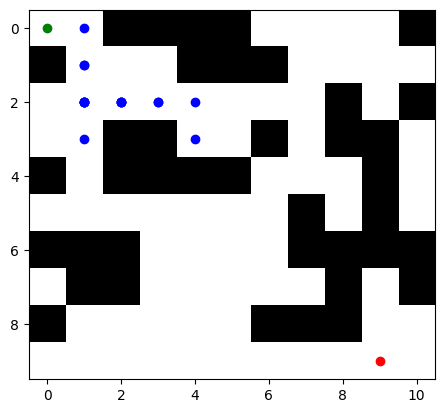

Generation 20:


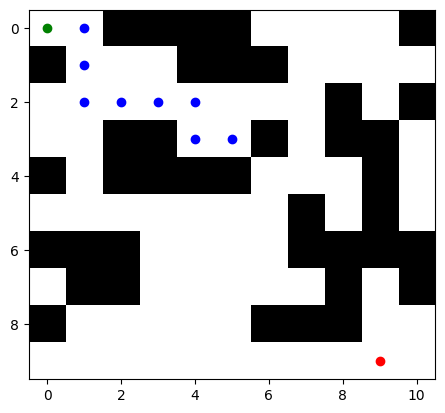

Generation 30:


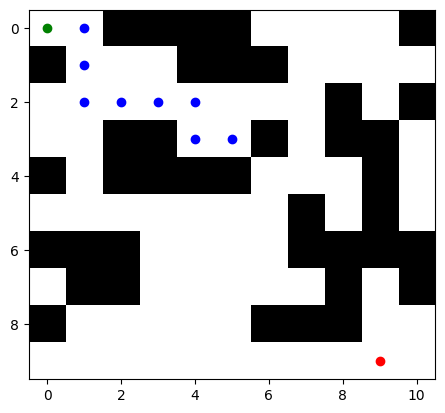

Generation 40:


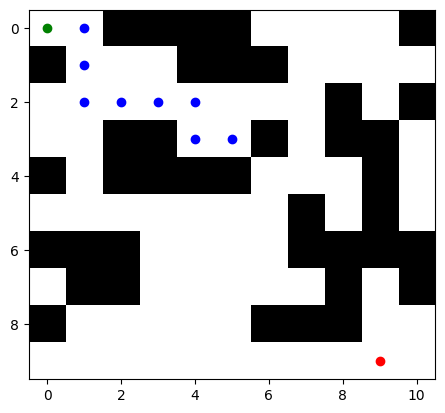

Generation 50:


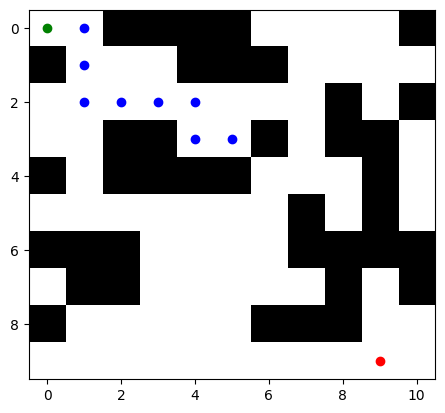

Generation 60:


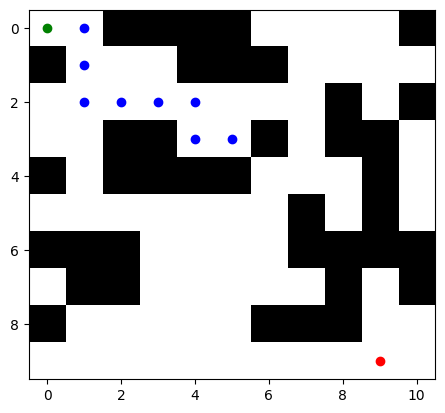

Generation 1700:


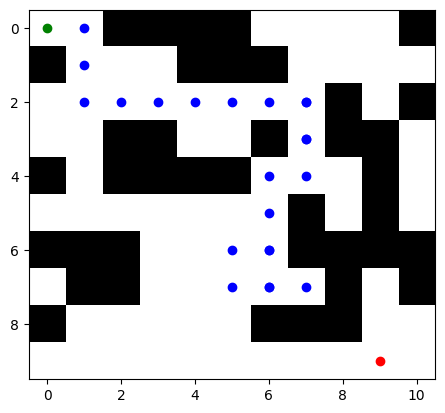

Generation 1800:


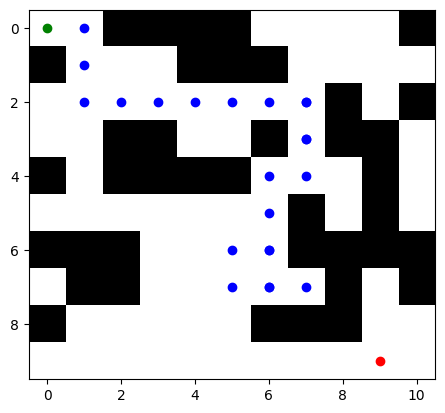

Generation 1900:


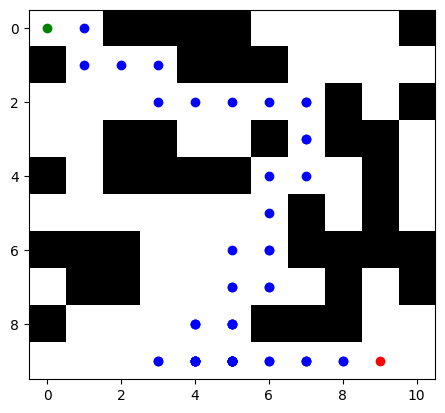

Generation 2000:


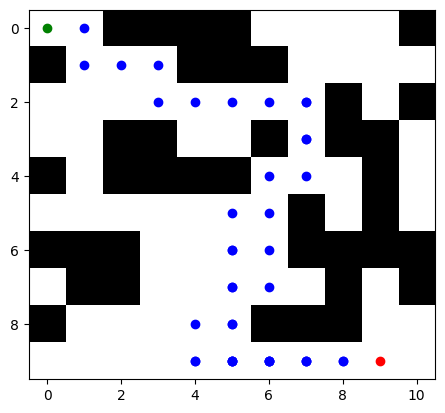

Generation 2200:


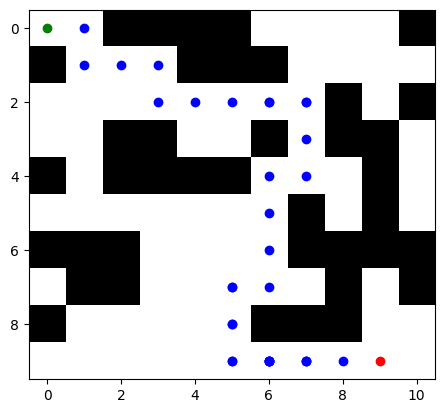

Generation 2800:


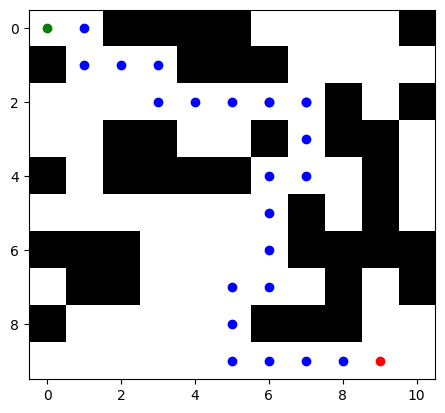

Generation 2989:


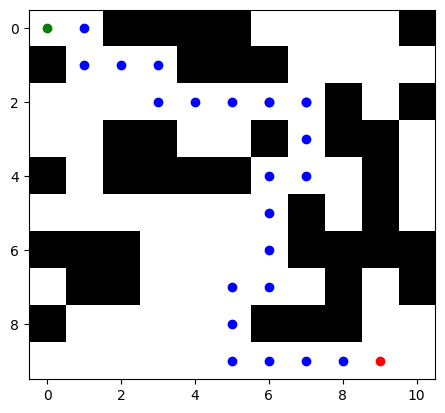

Generation 3000:


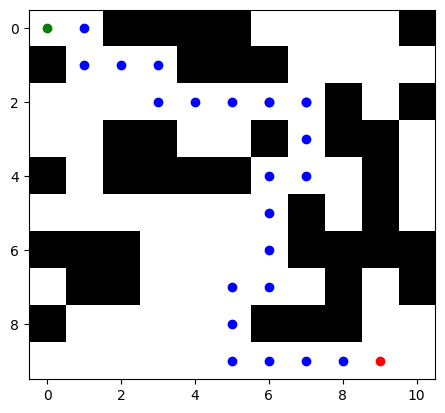

Generation 4000:


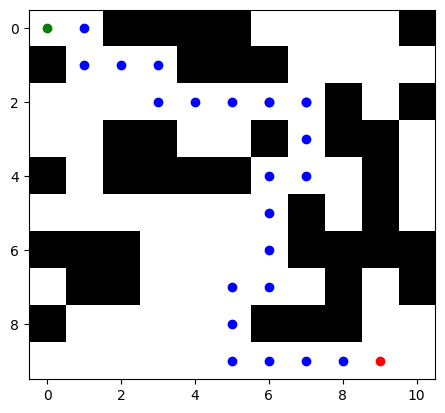

Generation 4998:


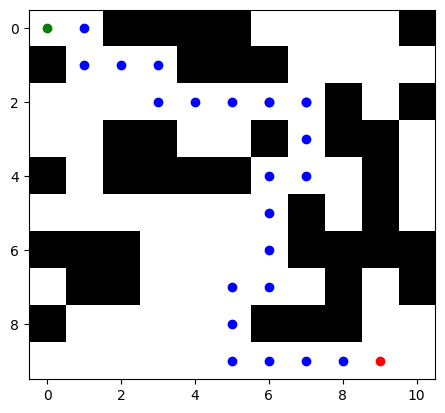

In [256]:
run_GEN()